In [1]:
import numpy as np
import pandas as pd

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from googletrans import Translator, constants

%matplotlib inline

In [2]:
df = pd.read_csv('dataset_Vaksin.csv')
df

,Nama,Komentar,Tanggal
0,Princess Mirabella,Saya kalo di ijinkan untuk menggantikan Orang ...,11-Jan
1,Dimas Andrian,"Cepat hilang Corona,sesak nafas aku pake maske...",11-Jan
2,Vanesa Warouw,g urusin dulu orng2 yg pda kelaparan efek dr p...,11-Jan
3,Samuel Djabumir Sam,Berikan kepada yg kena virus corona di rsu mau...,11-Jan
4,Puput Arisandiwa,"pengen sih dipaksin, toh demi kebaikan kita ju...",11-Jan
...,...,...,...
2125,Ratna,Assalamualaikum Jika Anda Membutuhkan Dana Pin...,Yesterday at 12:13
2126,Mahardias Fadilah Setiabudi,"Saya tenaga kesehatan di apotek, tp knp waktu ...",Yesterday at 07:34
2127,Nyai Iteung Iteung,Kasih..duit rakyat susah bkn covid trs....nee ...,Monday at 22:25
2128,Fendi Pendie,Aku hanya butuh pemimpin amanah bukan data cop...,Monday at 21:41


In [4]:
df.columns.map(type)

Index([<class 'str'>, <class 'str'>, <class 'str'>], dtype='object')

In [4]:
df.columns = df.columns.astype(str)

In [5]:
df.columns.map(type)

Index([<class 'str'>, <class 'str'>, <class 'str'>], dtype='object')

In [8]:
df['Komentar'].map(type)

KeyError: 'Komentar'

<AxesSubplot:>

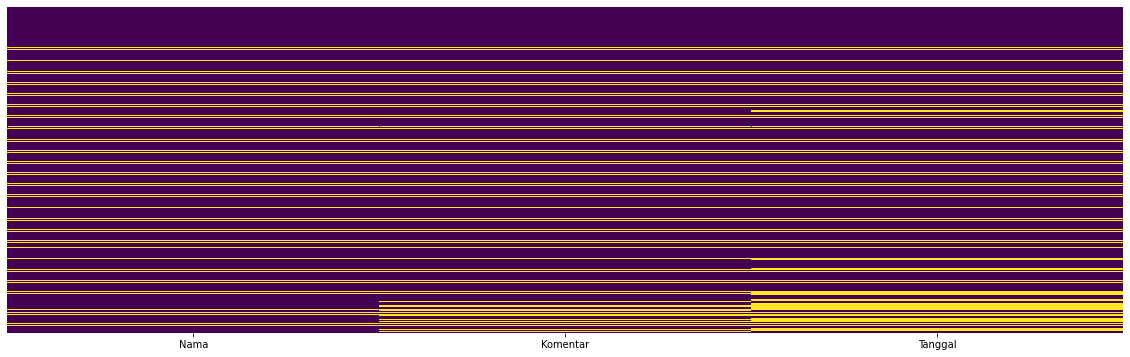

In [3]:
# Menampilkan data2 yang tidak lengkap

plt.figure(figsize=(20, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

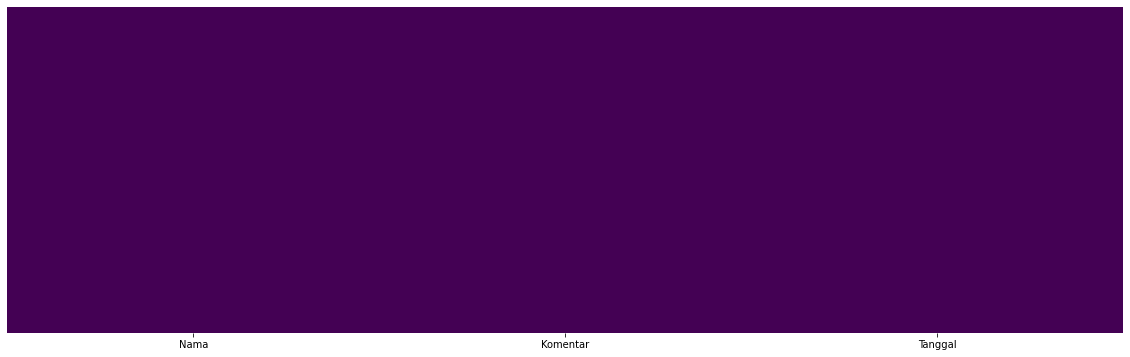

In [4]:
# Menghapus data2 yang tidak lengkap

df.dropna(inplace=True)
plt.figure(figsize=(20, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
Komentar = df['Komentar']
Komentar

0       Saya kalo di ijinkan untuk menggantikan Orang ...
1       Cepat hilang Corona,sesak nafas aku pake maske...
2       g urusin dulu orng2 yg pda kelaparan efek dr p...
3       Berikan kepada yg kena virus corona di rsu mau...
4       pengen sih dipaksin, toh demi kebaikan kita ju...
                              ...                        
2125    Assalamualaikum Jika Anda Membutuhkan Dana Pin...
2126    Saya tenaga kesehatan di apotek, tp knp waktu ...
2127    Kasih..duit rakyat susah bkn covid trs....nee ...
2128    Aku hanya butuh pemimpin amanah bukan data cop...
2129                                     Mau minta tolong
Name: Komentar, Length: 1638, dtype: object

# Sentiment Analysis menggunakan library TextBlob

### Percobaan untuk memeriksa kemampuan TextBlob dalam melakukan klasifikasi sentiment

In [8]:
# Kalimat dalam bahasa Indonesia akan di translate, karena textBlob library hanya dapat memproses text berbahasa inggris

positif = "Saya suka kucing. Saya sangat menyukai kucing, kucing adalah peliharaan terbaik!"
netral = "Kucing adalah hewan peliharaan. Tetangga saya punya seekor kucing. Kucing itu bernama Bonny."
negatif = "Saya benci kucing! Kucing selalu menciptakan banyak masalah! Saya tidak mau melihat hewan itu lagi!"

positif_blob = TextBlob(positif)
tran_pstv = positif_blob.translate(from_lang='id', to='en')

netral_blob = TextBlob(netral)
tran_ntrl = netral_blob.translate(from_lang='id', to='en')

negatif_blob = TextBlob(negatif)
tran_ngtv = negatif_blob.translate(from_lang='id', to='en')

print("Kalimat Positif: ", tran_pstv.sentiment)
print("Kalimat Netral: ", tran_ntrl.sentiment)
print("Kalimat Negatif: ", tran_ngtv.sentiment)

Kalimat Positif:  Sentiment(polarity=0.6, subjectivity=0.25)
Kalimat Netral:  Sentiment(polarity=0.3, subjectivity=0.9)
Kalimat Negatif:  Sentiment(polarity=-0.65625, subjectivity=0.55)


In [9]:
df['Komentar'].map(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
2125    <class 'str'>
2126    <class 'str'>
2127    <class 'str'>
2128    <class 'str'>
2129    <class 'str'>
Name: Komentar, Length: 1638, dtype: object

In [6]:
translator = Translator()
df['translate_En'] = df['Komentar'].apply(translator.translate, src='id', dest='en')
df['translate_En'] = df['translate_En'].apply(getattr, args=('text',))

AttributeError: 'NoneType' object has no attribute 'group'

#### Semakin tinggi polarity akan menunjukan respon yg positif

In [11]:
#load the descriptions into textblob
desc_blob = [TextBlob(desc) for desc in df['Komentar']]
#add the sentiment metrics to the dataframe
df['Polarity'] = [b.sentiment.polarity for b in desc_blob]
df['Subjectivity'] = [b.sentiment.subjectivity for b in desc_blob]


df

,Nama,Komentar,Tanggal,Polarity,Subjectivity
0,Princess Mirabella,Saya kalo di ijinkan untuk menggantikan Orang ...,11-Jan,0.0,0.0
1,Dimas Andrian,"Cepat hilang Corona,sesak nafas aku pake maske...",11-Jan,0.0,0.0
2,Vanesa Warouw,g urusin dulu orng2 yg pda kelaparan efek dr p...,11-Jan,0.0,0.0
3,Samuel Djabumir Sam,Berikan kepada yg kena virus corona di rsu mau...,11-Jan,0.0,0.0
4,Puput Arisandiwa,"pengen sih dipaksin, toh demi kebaikan kita ju...",11-Jan,0.0,0.0
...,...,...,...,...,...
2125,Ratna,Assalamualaikum Jika Anda Membutuhkan Dana Pin...,Yesterday at 12:13,0.2,0.3
2126,Mahardias Fadilah Setiabudi,"Saya tenaga kesehatan di apotek, tp knp waktu ...",Yesterday at 07:34,0.0,0.0
2127,Nyai Iteung Iteung,Kasih..duit rakyat susah bkn covid trs....nee ...,Monday at 22:25,0.0,0.0
2128,Fendi Pendie,Aku hanya butuh pemimpin amanah bukan data cop...,Monday at 21:41,0.0,0.0


# Sentiment Analysis menggunakan VADER

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator, constants

translator = Translator()

Vader= SentimentIntensityAnalyzer()
positif = "Saya suka kucing. Saya sangat menyukai kucing, kucing adalah peliharaan terbaik!"
negatif = "Saya benci kucing! Kucing selalu menciptakan banyak masalah! Saya tidak mau melihat hewan itu lagi!"
translate_positif = translator.translate(positif)
translate_negatif = translator.translate(negatif)

positif = Vader.polarity_scores(translate_positif.text)
negatif = Vader.polarity_scores(translate_negatif.text)

print("Kalimat Positif: ", positif)
print("Kalimat Negatif: ", negatif)

Kalimat Positif:  {'neg': 0.0, 'neu': 0.479, 'pos': 0.521, 'compound': 0.8685}
Kalimat Negatif:  {'neg': 0.345, 'neu': 0.569, 'pos': 0.085, 'compound': -0.7505}


In [18]:
#Add VADER metrics to dataframe
df['compound'] = [Vader.polarity_scores(x)['compound'] for x in df["Komentar"]]
df['positif'] = [Vader.polarity_scores(x)['pos'] for x in df['Komentar']]
df['netral'] = [Vader.polarity_scores(x)['neu'] for x in df['Komentar']]
df['negatif'] = [Vader.polarity_scores(x)['neg'] for x in df['Komentar']]


df

TypeError: 'int' object is not iterable